<a href="https://colab.research.google.com/github/yupAyush/projects/blob/main/Braintumour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle(1).json to kaggle(1).json
User uploaded file "kaggle(1).json" with length 65 bytes


In [ ]:
!kaggle  datasets download -d sartajbhuvaji/brain-tumor-classification-mri


Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 92% 80.0M/86.8M [00:01<00:00, 94.0MB/s]
100% 86.8M/86.8M [00:01<00:00, 75.1MB/s]


In [ ]:
!unzip /content/brain-tumor-classification-mri.zip

Archive:  /content/brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg

In [ ]:
import keras
from keras.models import Sequential
from keras.layers  import Conv2D,Flatten,Dense,MaxPool2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
import os
import cv2
x_train=[]
y_train=[]
imgs=150
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
  folderPath=os.path.join('/content/Training',i)
  for j in os.listdir(folderPath):
    image= cv2.imread(os.path.join(folderPath,j))
    image=cv2.resize(image,(imgs,imgs))
    x_train.append(image)
    y_train.append(i)


for i in labels:
  folderPath=os.path.join('/content/Testing',i)
  for j in os.listdir(folderPath):
    image= cv2.imread(os.path.join(folderPath,j))
    image=cv2.resize(image,(imgs,imgs))
    x_train.append(image)
    y_train.append(i)

x_train =np.array(x_train)
y_train=np.array(y_train)

In [ ]:
x_train,y_train = shuffle(x_train,y_train,random_state=101)



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new=[]
for  i in y_train:
  y_train_new.append(labels.index(i))

y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)


y_test_new=[]
for i in y_test:
  y_test_new.append(labels.index(i))

y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [ ]:
history=model.fit(x_train,y_train ,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - acc: 0.2794 - loss: 4.7531 - val_acc: 0.3435 - val_loss: 1.3603
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - acc: 0.3878 - loss: 1.2689 - val_acc: 0.5748 - val_loss: 1.0388
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - acc: 0.5587 - loss: 0.9663 - val_acc: 0.6531 - val_loss: 0.8506
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - acc: 0.6427 - loss: 0.8079 - val_acc: 0.6735 - val_loss: 0.7745
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - acc: 0.6997 - loss: 0.7248 - val_acc: 0.6905 - val_loss: 0.7140
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - acc: 0.7342 - loss: 0.6312 - val_acc: 0.6565 - val_loss: 0.7576
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - acc: 0.7851 - loss: 0.5442 - val_acc: 0.6667 - val_loss: 0.6676
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - acc: 0.8049 - loss: 0.4645 - val_acc: 0.7109 - val_loss: 0.6474
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - acc: 0.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model.save('brainTumourDetection.h5')

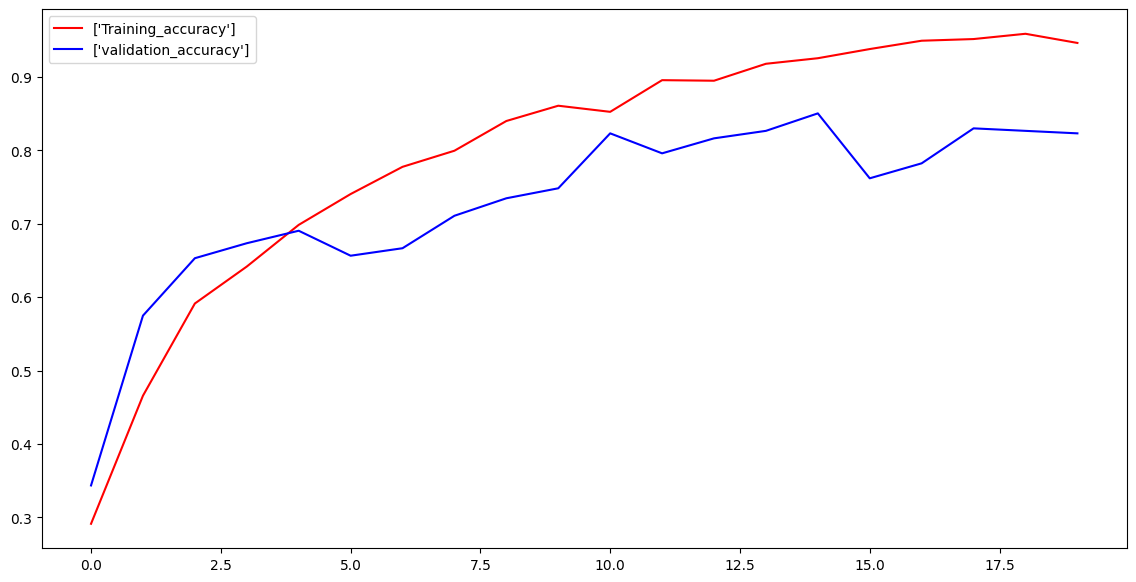

In [ ]:
acc =history.history['acc']
val_acc= history.history['val_acc']
epochs =range(len(acc))
fig =plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label=['Training_accuracy'])
plt.plot(epochs,val_acc,'b',label=['validation_accuracy'])
plt.legend(loc='upper left')
plt.show()

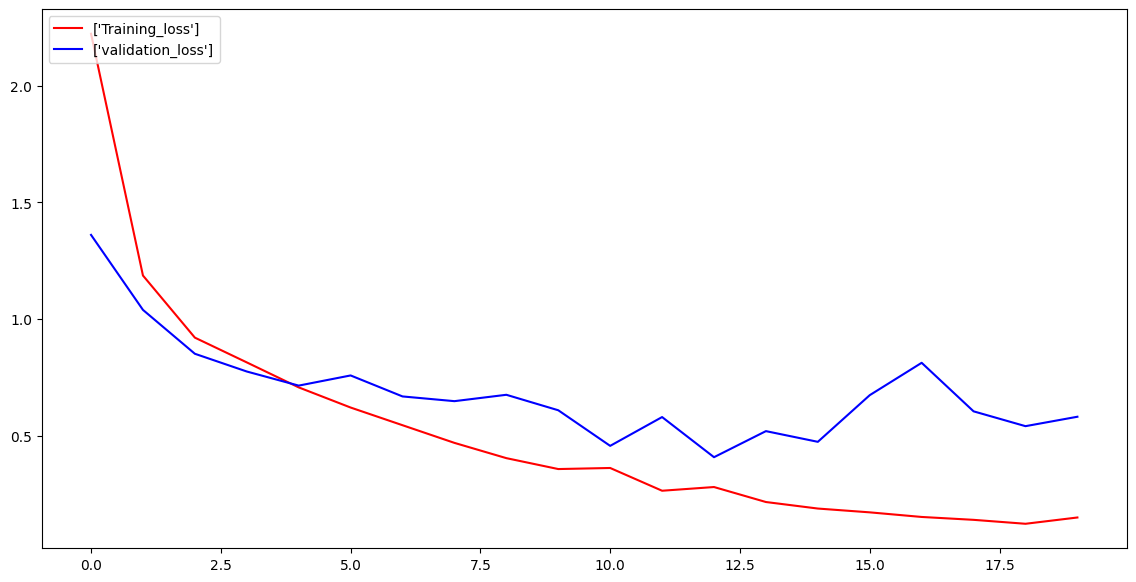

In [ ]:
loss =history.history['loss']
val_loss= history.history['val_loss']
epochs =range(len(loss))
fig =plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label=['Training_loss'])
plt.plot(epochs,val_loss,'b',label=['validation_loss'])
plt.legend(loc='upper left')
plt.show()

In [ ]:
img=cv2.imread('/content/Testing/glioma_tumor/image(100).jpg')
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img_array=img_array.reshape(1,150,150,3)
img_array.shape


(1, 150, 150, 3)

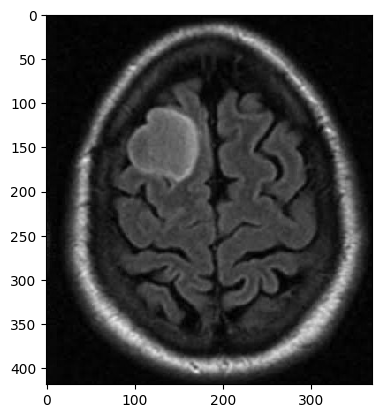

In [ ]:
from tensorflow.keras.preprocessing import image
img=image.load_img('//content/Testing/glioma_tumor/image(100).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()


In [49]:
a=model.predict(img_array)
ind=np.argmax(a,axis=1)
if ind==0:
  print("glioma_tumor")
elif ind==1:
   print("meningioma_tumor")
elif ind==2:
  pass

  print("no_tumor")
else:
  print("pitutary_tumor")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
glioma_tumor


glioma_tumor
